# ARIMA - autoregresive integrated moving average model

Ensure stationarity no matter the underlying data

"Integrated" accounts for the number of non-seasonal differences we need to examine to establish stationarity.

For some data, a single factor of integration is enough to reach stationarity.

ARIMA order (p, d, q) 

ARIMA(p, 0, q) ≈ ARMA(p, q)

ARIMA(p, 0, 0) ≈ AR (p)

ARIMA(0, 0, q) ≈ MA (q)

ΔP<sub>t</sub> = c + φ<sub>1</sub> * P<sub>t - 1</sub> + θ<sub>1</sub> * ε<sub>t - 1</sub> + ε<sub>t</sub>

P<sub>t</sub>, P<sub>t - 1</sub> - values in the current period and 1 period ago respectively

ε<sub>t</sub>, ε<sub>t - 1</sub> - error terms for the same two periods

c - baseline constant factor

φ<sub>1</sub> - what part of the value last period is relevant in explaining the current one

θ<sub>1</sub> - what part of the error last period is relevant in explaining the current value

ΔP<sub>t</sub> - difference between prices in period t

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [32]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [33]:
df_comp['market_value'] = df_comp.ftse
#del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [34]:
def LLR_test(mod_1, mod_2, DF=1): # models we want to compare and degrees of freedom
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = (2 * (L2 - L1))
  p = chi2.sf(LR, DF).round(3)
  return p

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df['returns'] = df.market_value.pct_change(1) * 100

## Fitting simple ARIMA model for Prices

In [37]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

# ARIMA(p,d,q) model estimates the same number of coefficients as ARMA(p,q) because the order of integration (d) does not affect the number of coefficients we are trying to find

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sun, 31 Oct 2021   AIC                          55215.333
Time:                        12:26:33   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.651      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.377      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

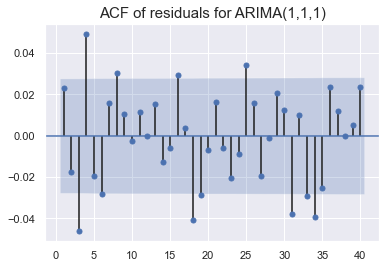

In [38]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF of residuals for ARIMA(1,1,1)', size=15)
plt.show()

## Higher-lag ARIMA models

These models came up with significant coefficients:

ARIMA(1,1,2)

ARIMA(1,1,3)

ARIMA(2,1,1)

ARIMA(3,1,1)

ARIMA(3,1,2)


In [39]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [40]:
print('ARIMA(1,1,1): \tLL = ', results_ar_1_i_1_ma_1.llf, '\tAIC = ', results_ar_1_i_1_ma_1.aic)
print('ARIMA(1,1,2): \tLL = ', results_ar_1_i_1_ma_2.llf, '\tAIC = ', results_ar_1_i_1_ma_2.aic)
print('ARIMA(1,1,3): \tLL = ', results_ar_1_i_1_ma_3.llf, '\tAIC = ', results_ar_1_i_1_ma_3.aic)
print('ARIMA(2,1,1): \tLL = ', results_ar_2_i_1_ma_1.llf, '\tAIC = ', results_ar_2_i_1_ma_1.aic)
print('ARIMA(3,1,1): \tLL = ', results_ar_3_i_1_ma_1.llf, '\tAIC = ', results_ar_3_i_1_ma_1.aic)
print('ARIMA(3,1,2): \tLL = ', results_ar_3_i_1_ma_2.llf, '\tAIC = ', results_ar_3_i_1_ma_2.aic)

# ARIMA(1,1,3) has the highest likelihood and lowest information coefficient

ARIMA(1,1,1): 	LL =  -27603.6664128074 	AIC =  55215.3328256148
ARIMA(1,1,2): 	LL =  -27600.081863130556 	AIC =  55210.16372626111
ARIMA(1,1,3): 	LL =  -27590.424032551957 	AIC =  55192.84806510391
ARIMA(2,1,1): 	LL =  -27599.807487846723 	AIC =  55209.61497569345
ARIMA(3,1,1): 	LL =  -27592.055371722698 	AIC =  55196.110743445395
ARIMA(3,1,2): 	LL =  -27590.660808974753 	AIC =  55195.32161794951


In [41]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))
print('\nLLR test p-value = ' + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2)))


LLR test p-value = 0.0

LLR test p-value = 0.0


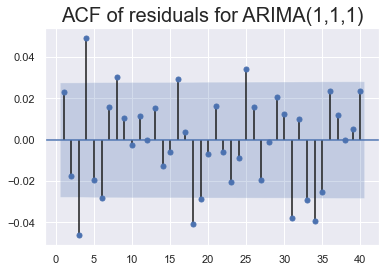

In [42]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF of residuals for ARIMA(1,1,1)', size=20)
plt.show()

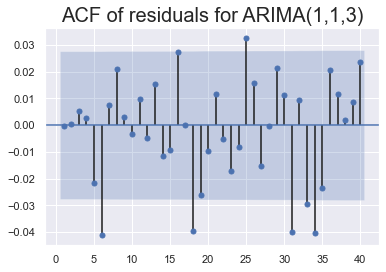

In [43]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero=False, lags=40)
plt.title('ACF of residuals for ARIMA(1,1,3)', size=20)
plt.show()
# there might exist a better model going back 6 lags

In [44]:
# Models 5,1,1 and 6,1,3 show better predictions
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5, 1, 1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6, 1, 3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [45]:
print('ARIMA(1,1,3): \tLL = ', results_ar_1_i_1_ma_3.llf, '\tAIC = ', results_ar_1_i_1_ma_3.aic)
print('ARIMA(5,1,1): \tLL = ', results_ar_5_i_1_ma_1.llf, '\tAIC = ', results_ar_5_i_1_ma_1.aic)
print('ARIMA(6,1,3): \tLL = ', results_ar_6_i_1_ma_3.llf, '\tAIC = ', results_ar_6_i_1_ma_3.aic)
# 5,1,1 and 6,1,3 are extremely close so we just assume they are equal, hence the 6,1,3 is preferred

ARIMA(1,1,3): 	LL =  -27590.424032551957 	AIC =  55192.84806510391
ARIMA(5,1,1): 	LL =  -27586.511888167355 	AIC =  55189.02377633471
ARIMA(6,1,3): 	LL =  -27583.565320539325 	AIC =  55189.13064107865


In [46]:
# 1,1,3 and 5,1,1 are nested in the ARIMA(6,1,3) so we can run the LLR test
print('\nLLR test p-value = ' + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF=5)))


LLR test p-value = 0.003


In [47]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF=3)))
# 6,1,3 fails the LLR test


LLR test p-value = 0.018


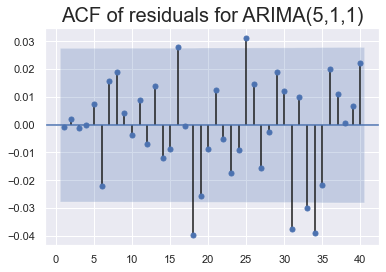

In [48]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF of residuals for ARIMA(5,1,1)', size=20)
plt.show()

## Higher levels of integration

We only rely on integratiom, when our time-series doesn't come from a stationary process

If a single layer of integration (d=1) accomplishes this, any additional ones are unneccessary 


How do we know if the integrated data set is stationary?

1. Manually create an integrated version of the oroginal time-series

2. Use the Augmented Dickey-Fuller test

In [49]:
df['delta_prices'] = df.market_value.diff(1) # looking for differences between values 1 period apart

In [50]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sun, 31 Oct 2021   AIC                          55215.333
Time:                        12:27:05   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.651      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.377      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
sts.adfuller(df.delta_prices[1:])
# p-value is 0, statistic coefficient is 10 times greater than 1% value 
# data set is stationary so there is no need for additional layers of integration

(-32.244093495707446,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.961042218914)

## ARIMA for stationary data

Issues:

More and more computationally expensive

Transform the data several times

Differentiate the values from zero

Failing to converge

Numerical instability

More layers we add, the harder it is to interpret the results

## Outside factors and the ARIMAX model

A model that takes int oaccount more than just past prices of past residuals

ARIMAX: 

ΔP<sub>t</sub> = c + βX + φ<sub>1</sub> * P<sub>t - 1</sub> + θ<sub>1</sub> * ε<sub>t - 1</sub> + ε<sub>t</sub>

β - value which will be fitted based on the model selection and the data

X - any variable we're interested in: time-varying measurement, categorical variable, boolean value, combinations of several different external factors, etc.

In [52]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Sun, 31 Oct 2021   AIC                          55217.112
Time:                        12:27:06   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5904      2.655     -0.222      0.824      -5.795       4.614
spx                      0.0011      0.002      0.452      0.651      -0.004       0.006
ar.L1.D.market_value     0.7456      0.070     10.578      0.000       0.607       0.884
ma.L1.D.market_value    -0.7917      0.065    -12.273      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3412           +0.0000j            1.3412            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

## Seasonality aspect

SARMA, SARIMA, SARIMAX

SARIMAX (P, D, Q, s) 

s - length of cycle - number of periods needed to pass before the tendency reappears

Capital letters denote seasonal values, lowercase letters are for non-seasonal values

SARIMAX(1,0,2)(2,0,1,5): 

P + Q + p + q = 6

y<sub>t</sub> = c + φ<sub>1</sub> * y<sub>t - 1</sub> + θ<sub>1</sub> * ε<sub>t - 1</sub> + θ<sub>2</sub> * ε<sub>t - 2</sub> + Φ<sub>1</sub> (y<sub>t - 5</sub> + φ<sub>1</sub> * y<sub>t - 6</sub>) + Φ<sub>2</sub> (y<sub>t - 10</sub> + φ<sub>1</sub> * y<sub>t - 11</sub>) + Θ<sub>1</sub>(ε<sub>t - 5</sub> + θ<sub>1</sub> * ε<sub>t - 6</sub> + θ<sub>2</sub> * ε<sub>t - 7</sub>)+ ε<sub>t</sub>


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
# SARIMAX(1,0,1)(2,0,1,5) S&P

model_sarimax = SARIMAX(df.market_value, exog=df.spx, order=(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.606
Date:                           Sun, 31 Oct 2021   AIC                          53439.211
Time:                                   12:45:09   BIC                          53484.861
Sample:                               01-07-1994   HQIC                         53455.208
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7020      0.035     76.343      0.000       2.633       2.771
ar.L1          0.9999      0.000   3418.723      0.000       0.999       1.000
ma.L1         -0.3120      0.009    -33.219      0.000      -0.330      -0.294
ar.S.L5        0.9630      0.005    210.129      0.000       0.954       0.972
ar.S.L10       0.0369      0.002     21.537      0.000       0.034       0.040
ma.S.L5       -0.9995      0.008   -128.430      0.000      -1.015      -0.984
sigma2      2438.7510     28.824     84.607      0.000    2382.256    2495.246
===================================================================================
Ljung-Box (Q):                       95.87   Jarque-Bera (JB):              4178.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicting stability

Volatility - magnitude of ε<sub>t</sub>

Low variance suggests stability which suggests low risk. Measuring volatility is key when we want safety in our investments


By squaring values we differentiate between positive and negative volatilities. 